In [1]:
pip install pandas plotly ipywidgets voila

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 2.8 MB/s eta 0:00:00.9 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.



### 📈 Dashboard Charts Explained:
- **Chart 1:** Visitors per Zone
- **Chart 2:** Seat Utilization
- **Chart 3:** Available Seats
- **Chart 4:** Calendar – library events (past 30 days)


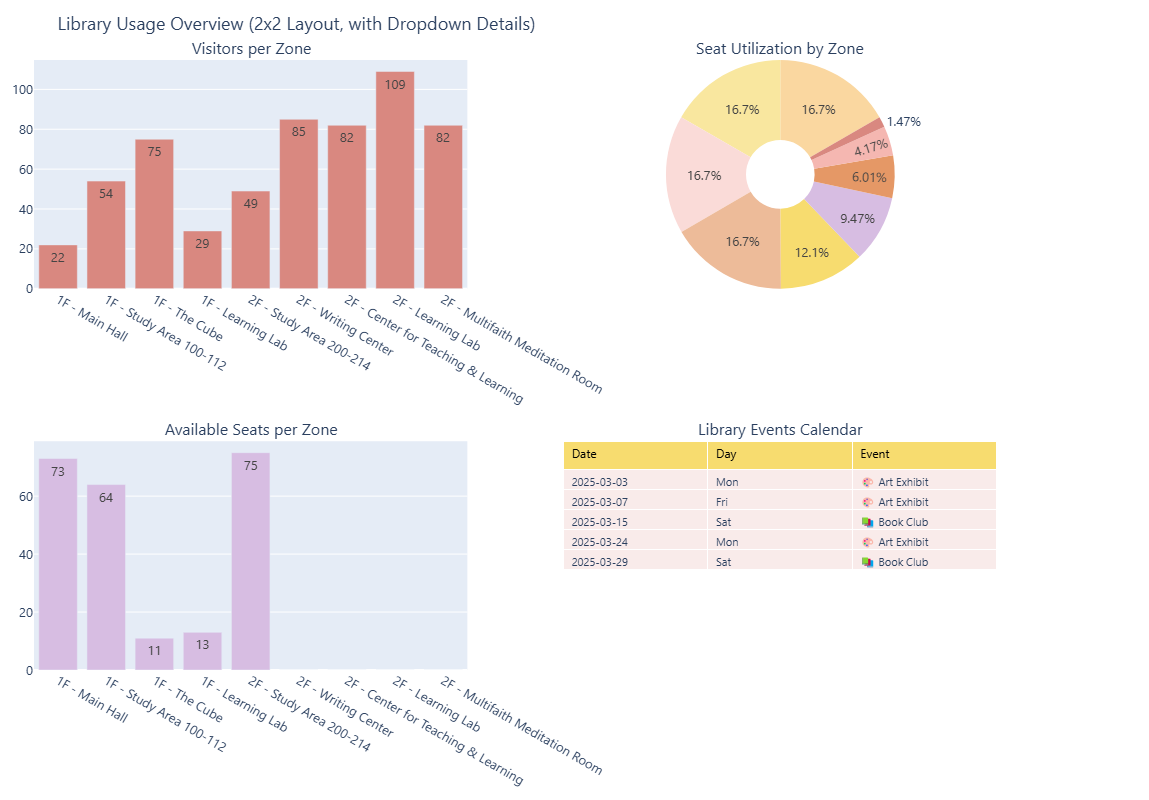

In [10]:
# 📊 UOP Library Dashboard (Clean Version)

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, Markdown, HTML
import random
from datetime import datetime, timedelta
from ipywidgets import VBox, Layout

# Define library zones
areas = [
    '1F - Main Hall', '1F - Study Area 100-112', '1F - The Cube', '1F - Learning Lab',
    '2F - Study Area 200-214', '2F - Writing Center', '2F - Center for Teaching & Learning',
    '2F - Learning Lab', '2F - Multifaith Meditation Room'
]

# Simulate data
today = datetime.now().strftime('%Y-%m-%d')
data = {
    'Date': [today] * len(areas),
    'Zone': areas,
    'Visitors': [random.randint(20, 120) for _ in areas],
    'Total Seats': [80, 100, 40, 30, 100, 20, 25, 30, 15]
}

df = pd.DataFrame(data)
df['Available Seats'] = df['Total Seats'] - df['Visitors'].apply(lambda x: int(x * random.uniform(0.3, 0.7)))
df['Available Seats'] = df['Available Seats'].apply(lambda x: max(x, 0))
df['Utilization (%)'] = ((df['Total Seats'] - df['Available Seats']) / df['Total Seats'] * 100).round(1)

total_visits = df['Visitors'].sum()

# Title display
title_html = f"""
<h1 style='color:#D35400; font-family:Georgia; font-size:38px;'>📊 UOP Library Dashboard</h1>
<h3 style='color:#884EA0;'>📅 Date: {today}</h3>
<h3 style='color:#2471A3;'>👥 Total Visitors Today: {total_visits}</h3>
"""
display(HTML(title_html))

# Warm palette
warm_palette = ['#D98880', '#E59866', '#F7DC6F', '#D7BDE2', '#F5B7B1', '#FAD7A0', '#F9E79F', '#FADBD8', '#EDBB99']

# Dashboard intro text
display(Markdown("""
### 📈 Dashboard Charts Explained:
- **Chart 1:** Visitors per Zone
- **Chart 2:** Seat Utilization
- **Chart 3:** Available Seats
- **Chart 4:** Calendar – library events (past 30 days)
"""))

# Create 2x2 layout with calendar table
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}],
           [{"type": "xy"}, {"type": "table"}]],
    subplot_titles=("Visitors per Zone", "Seat Utilization by Zone", "Available Seats per Zone", "Library Events Calendar")
)

fig.add_trace(go.Bar(
    x=df['Zone'], y=df['Visitors'], name='Visitors',
    marker_color=warm_palette[0], text=df['Visitors'], textposition='auto'
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=df['Zone'], values=df['Utilization (%)'], name='Utilization', hole=0.3,
    marker=dict(colors=warm_palette)
), row=1, col=2)

fig.add_trace(go.Bar(
    x=df['Zone'], y=df['Available Seats'], name='Available Seats',
    marker_color=warm_palette[3], text=df['Available Seats'], textposition='auto'
), row=2, col=1)

# Events table chart (only active days)
calendar_dates = [datetime.now() - timedelta(days=i) for i in range(29, -1, -1)]
events = ["" for _ in range(30)]
for i in random.sample(range(30), 5):
    events[i] = random.choice(["📚 Book Club", "🧘 Meditation Hour", "💻 Coding Workshop", "🎨 Art Exhibit"])

calendar_df = pd.DataFrame({
    'Date': [d.strftime("%Y-%m-%d") for d in calendar_dates],
    'Weekday': [d.strftime("%a") for d in calendar_dates],
    'Event': events
})
calendar_df = calendar_df[calendar_df['Event'] != ""]

fig.add_trace(go.Table(
    header=dict(values=["Date", "Day", "Event"], fill_color="#F7DC6F", font=dict(color="black", size=12), align="left"),
    cells=dict(
        values=[calendar_df['Date'], calendar_df['Weekday'], calendar_df['Event']],
        fill_color=[["#F9EBEA"]*len(calendar_df)]*3,
        align="left", font=dict(size=11)
    )
), row=2, col=2)

fig.update_layout(
    height=800, width=1100, showlegend=False,
    title_text="Library Usage Overview (2x2 Layout, with Dropdown Details)",
    margin=dict(t=60, b=40, l=30, r=30),
    font=dict(family="Segoe UI", size=13)
)
fig.update_xaxes(tickangle=30)
fig.show()

# Interactive Dropdown for zone detail
dropdown = widgets.Dropdown(
    options=areas,
    description="Select Zone:",
    layout=Layout(width='60%', padding='0px 0px 0px 10px', height='40px'),
    style={'description_width': 'initial'}
)

output = widgets.Output(layout=Layout(border='1px solid #ccc', padding='10px', width='60%'))

def show_area_detail(selected_area):
    area_data = df[df['Zone'] == selected_area].iloc[0]
    with output:
        output.clear_output()
        display(Markdown(f"""
### 📍 Zone: {selected_area}
- 👥 Current Visitors: **{area_data['Visitors']}**
- 🪑 Total Seats: **{area_data['Total Seats']}**
- ✅ Available Seats: **{area_data['Available Seats']}**
- 🔁 Utilization Rate: **{area_data['Utilization (%)']}%**
"""))

widgets.interactive(show_area_detail, selected_area=dropdown)
display(VBox([dropdown, output], layout=Layout(align_items='flex-start')))